In [1]:
import os
import numpy as np
import matplotlib
import torch
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch import nn
import torch
import copy
from tqdm import tqdm, trange
import math

# from torch.utils.tensorboard import SummaryWriter
work_dir = "./"
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
device


class Curve_Model_All_In_One(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(7, 4096)
        self.linear2 = nn.Linear(4096, 4096)
        self.linear3 = nn.Linear(4096, 4096)
        self.linear4 = nn.Linear(4096, 3)


    def forward(self, x):
        x = self.linear1(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2(x)
        x = torch.nn.functional.relu(x)
        x = self.linear3(x)
        x = torch.nn.functional.relu(x)
        x = self.linear4(x)

        return x
    
    
    


In [27]:
np.stack(feature_list).shpea

(10911, 7)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.59it/s]


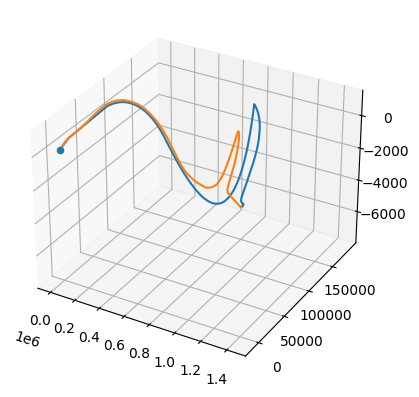

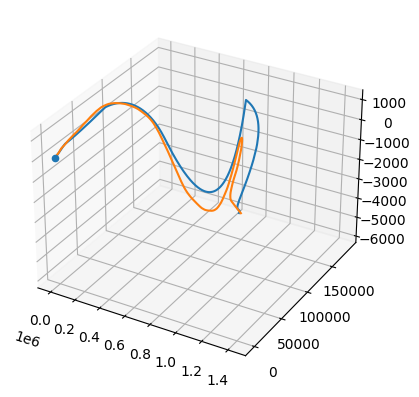

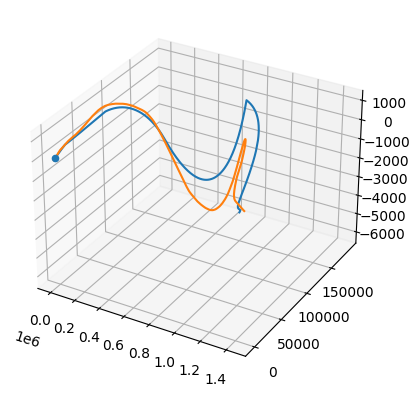

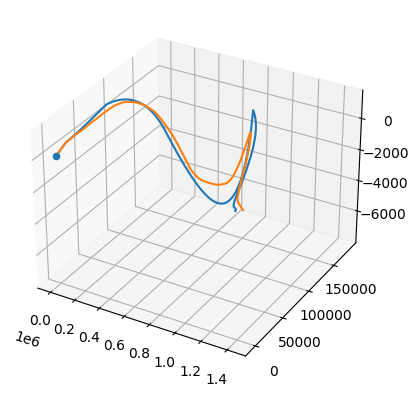

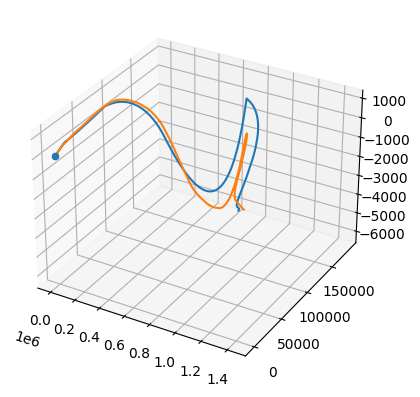

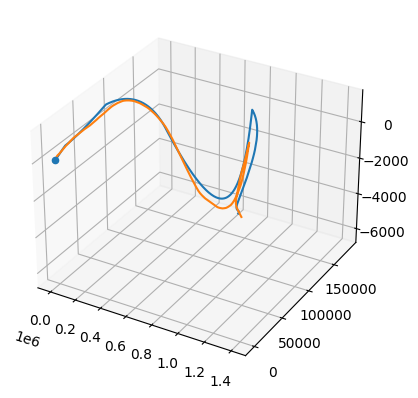

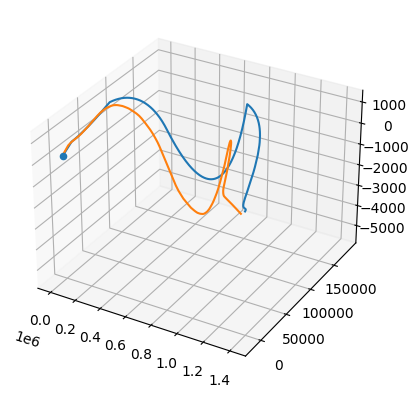

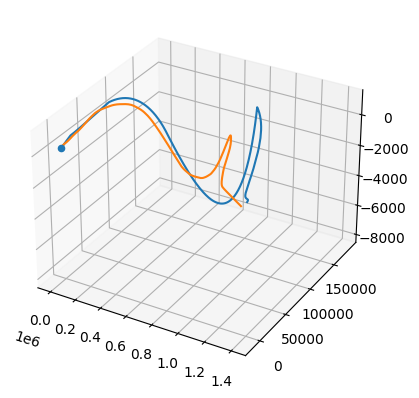

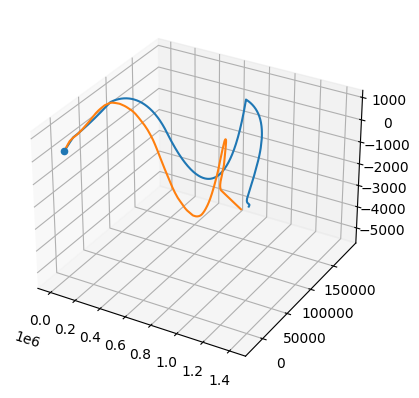

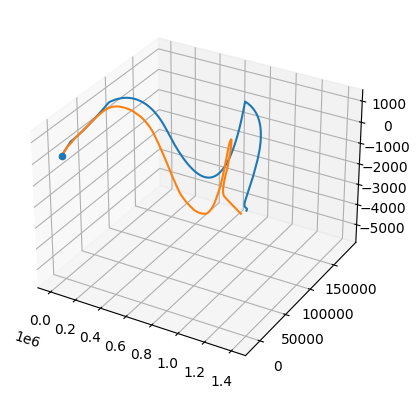

In [43]:
data_dir = f'{work_dir}data/data07081/'

# 时间, 起点b、l、h, 终点b、l、h 
# 发射系坐标
data_files = os.listdir(data_dir)[:10]
x_index = 7
label_index = 1
batch_size = 26240
model = torch.load("model/Curve_Model_All_In_One-learn_rate_1e-06-mse_loss-adam-epoch_97-loss_346846928960.0-last_lr_ 0.0000010000-err_ 840443.7089612312.chpk")
model.to(device)
model.eval()
with torch.no_grad():
    for i in trange(len(data_files)):
        file = data_files[i]
        single_trace = np.loadtxt(os.path.join(data_dir, file), dtype=np.float32)[:-2]
        start_point = single_trace[0, x_index: x_index + 3]
        end_point = single_trace[-1, x_index: x_index + 3]
        feature_list = []
        for j, one_time_data in enumerate(single_trace):
            time = one_time_data[:1]
            feature_list.append(np.concatenate((time, start_point, end_point)))
        pred_trace = []
        feature_tensor = torch.from_numpy(np.stack(feature_list))
#         test_dataset = torch.utils.data.TensorDataset(feature_tensor)
#         test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=feature_tensor.shape[0], sampler=None)
        for feature in test_dataloader:
#             print(type(feature))
            feature = feature_tensor.to(device)
            pred_points = model(feature).to('cpu')
            pred_trace.append(pred_points)
        pred_trace = np.stack(pred_trace).squeeze()
        
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot(xs=single_trace[:, label_index], ys=single_trace[:, label_index + 1], zs=single_trace[:, label_index + 2])
        fig.show()

        # 轨迹
        ax.plot(xs=pred_trace[:, 0], ys=pred_trace[:, 1], zs=pred_trace[:, 2])
        # 起点
        ax.scatter(single_trace[0, label_index], single_trace[0, label_index], single_trace[0, label_index], 'r')
        fig.show()

In [34]:
pred_trace

array([[ 1.02762500e+03, -9.38456909e+02, -9.89355469e+00],
       [ 1.02029297e+03, -9.33571533e+02, -9.66455078e+00],
       [ 1.01290039e+03, -9.28678711e+02, -9.41015625e+00],
       ...,
       [ 1.43657500e+06, -1.02359795e+04,  1.22040039e+02],
       [ 1.43668575e+06, -1.02487109e+04,  1.22163086e+02],
       [ 1.43679700e+06, -1.02613545e+04,  1.22294922e+02]], dtype=float32)

In [14]:
test_dataset[0]

(tensor([   0.0000,   94.4854,   17.4385, 4529.0498,   87.8509,   28.4147,
          131.3410]),)

In [15]:
np.concatenate((time, start_point, end_point))

array([ 545.5   ,   94.4854,   17.4385, 4529.05  ,   87.8509,   28.4147,
        131.341 ], dtype=float32)

In [18]:
feature

[tensor([[0.0000e+00, 9.4485e+01, 1.7438e+01,  ..., 8.7851e+01, 2.8415e+01,
          1.3134e+02],
         [5.0000e-02, 9.4485e+01, 1.7438e+01,  ..., 8.7851e+01, 2.8415e+01,
          1.3134e+02],
         [1.0000e-01, 9.4485e+01, 1.7438e+01,  ..., 8.7851e+01, 2.8415e+01,
          1.3134e+02],
         ...,
         [5.4540e+02, 9.4485e+01, 1.7438e+01,  ..., 8.7851e+01, 2.8415e+01,
          1.3134e+02],
         [5.4545e+02, 9.4485e+01, 1.7438e+01,  ..., 8.7851e+01, 2.8415e+01,
          1.3134e+02],
         [5.4550e+02, 9.4485e+01, 1.7438e+01,  ..., 8.7851e+01, 2.8415e+01,
          1.3134e+02]])]

In [20]:
np.stack(feature_list)

array([[0.00000e+00, 9.44854e+01, 1.74385e+01, ..., 8.78509e+01,
        2.84147e+01, 1.31341e+02],
       [5.00000e-02, 9.44854e+01, 1.74385e+01, ..., 8.78509e+01,
        2.84147e+01, 1.31341e+02],
       [1.00000e-01, 9.44854e+01, 1.74385e+01, ..., 8.78509e+01,
        2.84147e+01, 1.31341e+02],
       ...,
       [5.45400e+02, 9.44854e+01, 1.74385e+01, ..., 8.78509e+01,
        2.84147e+01, 1.31341e+02],
       [5.45450e+02, 9.44854e+01, 1.74385e+01, ..., 8.78509e+01,
        2.84147e+01, 1.31341e+02],
       [5.45500e+02, 9.44854e+01, 1.74385e+01, ..., 8.78509e+01,
        2.84147e+01, 1.31341e+02]], dtype=float32)

In [30]:
single_trace[:, x_index].shape

(10911,)

In [31]:
pred_trace[:, 0].shape

(1, 3)

In [32]:
pred_trace.shape

(1, 10911, 3)